**<font size=6>郑州市空气质量数据</font>**

**<font size=5>一、数据预处理</font>**

**<font size=4>1. 读取数据</font>**

In [1]:
import numpy as np
import pandas as pd

In [203]:
filename = "data\changedData\changed2019.csv"

In [204]:
data = pd.read_csv(filename, header=0, encoding="utf-8")
data.head()

,date,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
0,20190101,0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056
1,20190101,1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050
2,20190101,2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056
3,20190101,3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078
4,20190101,4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100


**<font size=4>2. 查看数据</font>**

In [205]:
#查看数据格式
data.dtypes

date           int64
hour           int64
AQI          float64
PM2.5        float64
PM2.5_24h    float64
PM10         float64
PM10_24h     float64
SO2          float64
SO2_24h      float64
NO2          float64
NO2_24h      float64
O3           float64
O3_24h       float64
O3_8h        float64
O3_8h_24h    float64
CO           float64
CO_24h       float64
dtype: object

In [206]:
data.shape

(5697, 17)

In [207]:
#查看数据是否含有缺失值
data.count()

date         5697
hour         5697
AQI          5659
PM2.5        5659
PM2.5_24h    5659
PM10         5659
PM10_24h     5659
SO2          5659
SO2_24h      5659
NO2          5659
NO2_24h      5659
O3           5659
O3_24h       5659
O3_8h        5659
O3_8h_24h    5659
CO           5659
CO_24h       5659
dtype: int64

这里可以看到还是有缺失值存在的
**<font color=red>在将数据应用于系统之前，一定要对缺省值进行处理</font>**

In [208]:
#找出含有缺失值的列
hasNAN = data.isnull().any()
hasNAN[hasNAN==True]

AQI          True
PM2.5        True
PM2.5_24h    True
PM10         True
PM10_24h     True
SO2          True
SO2_24h      True
NO2          True
NO2_24h      True
O3           True
O3_24h       True
O3_8h        True
O3_8h_24h    True
CO           True
CO_24h       True
dtype: bool

查看数据的统计信息

In [209]:
data.describe()

,date,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
count,5.697000e+03,5697.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,2.019046e+07,11.488503,98.825764,58.999823,59.424280,108.077929,108.585262,8.966248,9.044531,40.816752,41.093656,74.062379,137.024386,70.972080,80.539495,0.839821,0.843168
std,2.262998e+02,6.922975,62.680354,55.924346,51.751487,68.193830,58.576391,6.161726,5.176434,24.342100,17.795371,52.839297,57.571958,48.060999,49.599096,0.404770,0.354093
min,2.019010e+07,0.000000,13.000000,5.000000,5.000000,3.000000,12.000000,1.000000,2.000000,4.000000,7.000000,1.000000,15.000000,2.000000,2.000000,0.090000,0.120000
25%,2.019030e+07,5.000000,61.000000,25.000000,27.000000,62.000000,70.000000,4.000000,5.000000,21.000000,28.000000,33.000000,92.000000,34.000000,45.000000,0.578000,0.610000
50%,2.019043e+07,11.000000,79.000000,37.000000,39.000000,90.000000,91.000000,8.000000,8.000000,34.000000,39.000000,64.000000,134.000000,62.000000,73.000000,0.730000,0.730000
75%,2.019063e+07,17.000000,114.500000,69.000000,69.000000,131.000000,133.000000,12.000000,12.000000,56.000000,50.000000,106.500000,185.000000,100.000000,110.000000,0.944000,0.933000
max,2.019083e+07,23.000000,454.000000,429.000000,291.000000,546.000000,347.000000,56.000000,32.000000,130.000000,110.000000,299.000000,307.000000,257.000000,258.000000,3.489000,2.867000


In [210]:
import matplotlib.pyplot as plt

In [211]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CAFD630>,
      dtype=object)

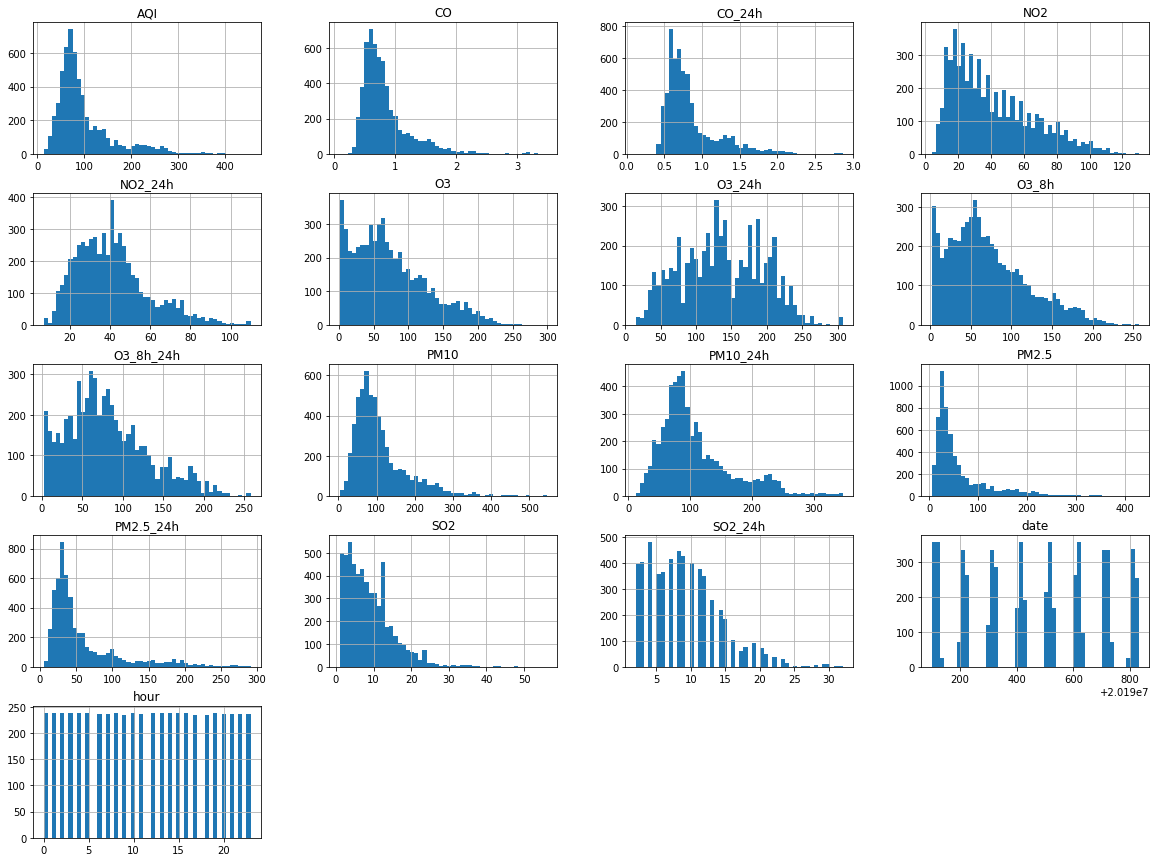

In [212]:
data.hist(bins=50, figsize=(20,15))

查看属性间的相关性系数

In [213]:
corr_matrix = data.corr()

In [214]:
corr_matrix["O3"].sort_values(ascending=False)

O3           1.000000
O3_8h        0.798153
O3_8h_24h    0.726112
O3_24h       0.627584
date         0.454443
hour         0.375238
AQI         -0.245074
PM10_24h    -0.265105
SO2_24h     -0.288998
NO2_24h     -0.293387
PM10        -0.296789
SO2         -0.329338
CO_24h      -0.332261
PM2.5_24h   -0.343302
PM2.5       -0.373245
CO          -0.431693
NO2         -0.654104
Name: O3, dtype: float64

绘制相关性图像

In [215]:
from pandas.plotting import scatter_matrix

In [216]:
attributes = data.columns[2:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000112DEBE0>,
      dtype=object)

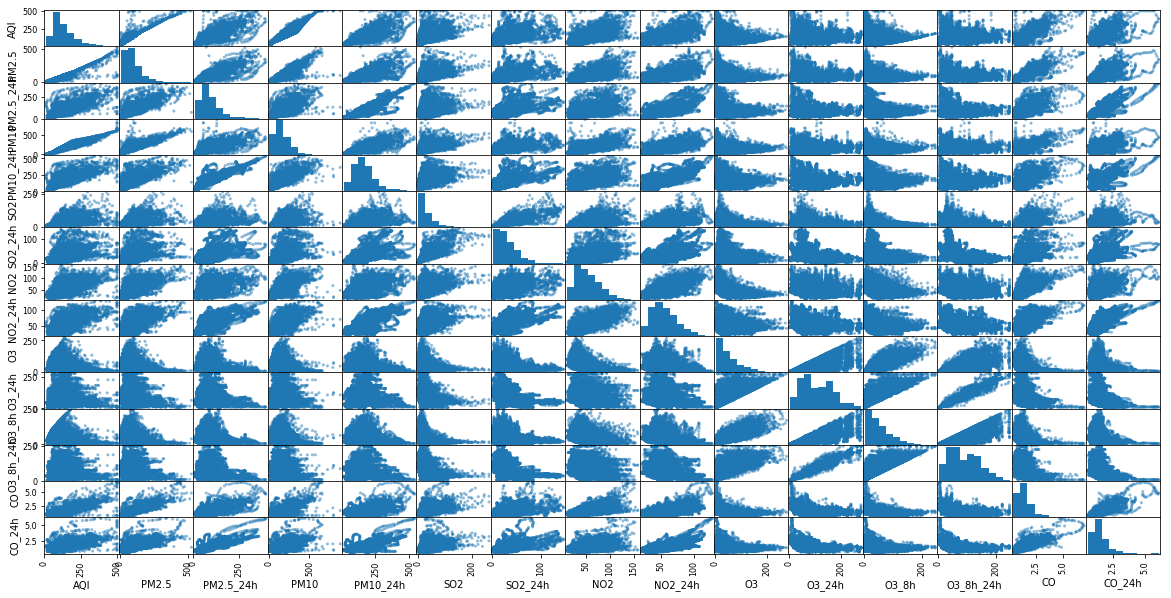

In [22]:
scatter_matrix(data[attributes], figsize=(20,10))

和03相关性最高的是NO2，查看两个的图像

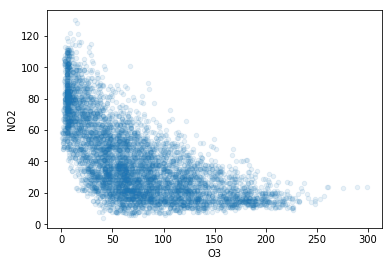

In [217]:
data.plot(kind="scatter", x="O3", y="NO2", alpha=0.1)

**<font size=4>3. 处理缺失值</font>**

（利用中值、中位数填充数据）

可以发现除了日期和时间字段，其他字段都有缺失值

首先，将日期和时间字段划分出来

In [218]:
datetime = data[["date","hour"]]
datetime.head()

,date,hour
0,20190101,0
1,20190101,1
2,20190101,2
3,20190101,3
4,20190101,4


然后，打算对其他字段的缺省值进行中值填充

In [219]:
otherdata = data.drop(["date", "hour"], axis=1)

In [220]:
otherdata.head()

,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056
1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050
2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056
3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078
4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100


使用sklearn包中提供的impute模型的中值填充功能

In [221]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [222]:
imputer.fit(otherdata)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [223]:
imputer.statistics_

array([ 79.  ,  37.  ,  39.  ,  90.  ,  91.  ,   8.  ,   8.  ,  34.  ,
        39.  ,  64.  , 134.  ,  62.  ,  73.  ,   0.73,   0.73])

In [224]:
datanew = imputer.transform(otherdata)

In [225]:
datanew = pd.DataFrame(datanew, columns = data.columns[2:])

In [226]:
datanew

,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056
1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050
2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056
3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078
4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100
5,144.0,110.0,92.0,152.0,128.0,15.0,19.0,65.0,62.0,4.0,43.0,4.0,4.0,1.422,1.111
6,150.0,115.0,93.0,159.0,130.0,15.0,19.0,65.0,62.0,4.0,43.0,4.0,4.0,1.456,1.122
7,150.0,115.0,94.0,162.0,132.0,15.0,19.0,68.0,62.0,4.0,43.0,4.0,4.0,1.489,1.122
8,149.0,114.0,95.0,167.0,134.0,16.0,19.0,71.0,62.0,4.0,43.0,4.0,4.0,1.522,1.167
9,154.0,117.0,96.0,178.0,136.0,16.0,19.0,75.0,62.0,5.0,43.0,4.0,4.0,1.800,1.200


合并时间字段和填充后的其他数据字段

In [227]:
datanew = pd.concat([datetime, datanew], axis=1, join_axes=[datanew.index])

In [228]:
datanew.head()

,date,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
0,20190101,0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056
1,20190101,1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050
2,20190101,2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056
3,20190101,3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078
4,20190101,4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100


In [229]:
datanew.count()

date         5697
hour         5697
AQI          5697
PM2.5        5697
PM2.5_24h    5697
PM10         5697
PM10_24h     5697
SO2          5697
SO2_24h      5697
NO2          5697
NO2_24h      5697
O3           5697
O3_24h       5697
O3_8h        5697
O3_8h_24h    5697
CO           5697
CO_24h       5697
dtype: int64

可以发现目前已经没有缺失值了

**<font size=4>4. 日期处理</font>**

毕竟是时间序列，肯定要对时间进行处理。

把小时映射为2位整数，小于两位的在前面补零

In [230]:
datanew["hour"] = datanew["hour"].map(lambda x:("%02d")%x)

In [231]:
datanew.head()

,date,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
0,20190101,00,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056
1,20190101,01,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050
2,20190101,02,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056
3,20190101,03,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078
4,20190101,04,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100


合并date和hour，生成一个datetime列

In [232]:
datanew["datetime"] = datanew["date"].map(str) + datanew["hour"].map(str)

将datetime这列字符串格式的数据转换为datetime格式的数据

In [233]:
datanew["datetime"] = pd.to_datetime(datanew["datetime"], format="%Y%m%d%H")

In [234]:
datanew.head()

,date,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h,datetime
0,20190101,00,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056,2019-01-01 00:00:00
1,20190101,01,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050,2019-01-01 01:00:00
2,20190101,02,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056,2019-01-01 02:00:00
3,20190101,03,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078,2019-01-01 03:00:00
4,20190101,04,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100,2019-01-01 04:00:00


目前的date中年月日信息是连在一起的，便于后续操作，我们把信息独立分成三列

In [235]:
datanew["year"] = pd.DatetimeIndex(datanew.datetime).year

In [236]:
datanew["month"] = pd.DatetimeIndex(datanew.datetime).month

In [237]:
datanew["day"] = pd.DatetimeIndex(datanew.datetime).day

考虑到周末和工作日人们的生活方式可能与平常不大相同，单独再增加一列dayOfWeek，表示当前是一周的第几天

In [238]:
datanew["hour"] = pd.DatetimeIndex(datanew.datetime).hour

In [239]:
datanew.head()

,date,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,...,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h,datetime,year,month,day
0,20190101,0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,...,4.0,43.0,12.0,33.0,1.213,1.056,2019-01-01 00:00:00,2019,1,1
1,20190101,1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,...,4.0,44.0,4.0,4.0,1.250,1.050,2019-01-01 01:00:00,2019,1,1
2,20190101,2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,...,4.0,43.0,4.0,4.0,1.300,1.056,2019-01-01 02:00:00,2019,1,1
3,20190101,3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,...,4.0,43.0,4.0,4.0,1.356,1.078,2019-01-01 03:00:00,2019,1,1
4,20190101,4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,...,4.0,43.0,4.0,4.0,1.400,1.100,2019-01-01 04:00:00,2019,1,1


date字段目前没有什么用了，可以删掉了

In [240]:
datanew = datanew.drop(["date"], axis=1)

In [241]:
datanew.shape

(5697, 20)

In [242]:
datanew.dtypes

hour                  int64
AQI                 float64
PM2.5               float64
PM2.5_24h           float64
PM10                float64
PM10_24h            float64
SO2                 float64
SO2_24h             float64
NO2                 float64
NO2_24h             float64
O3                  float64
O3_24h              float64
O3_8h               float64
O3_8h_24h           float64
CO                  float64
CO_24h              float64
datetime     datetime64[ns]
year                  int64
month                 int64
day                   int64
dtype: object

将datetime设置为索引

In [243]:
datanew = datanew.set_index("datetime")
datanew.head()

,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h,year,month,day
datetime,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056,2019,1,1
2019-01-01 01:00:00,1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050,2019,1,1
2019-01-01 02:00:00,2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056,2019,1,1
2019-01-01 03:00:00,3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078,2019,1,1
2019-01-01 04:00:00,4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100,2019,1,1


将索引存储在dataIndex中，dataIndex是DatatimeIndex类型的。

In [244]:
dataIndex = datanew.index

调整一下列与列之间的位置

In [245]:
orderlist = ["year", "month", "day", "hour", "AQI", "PM2.5", "PM2.5_24h", "PM10", "PM10_24h","SO2","SO2_24h","NO2","NO2_24h","O3", "O3_24h", "O3_8h", "O3_8h_24h", "CO", "CO_24h"]
datanew = datanew[orderlist]
datanew.head()

,year,month,day,hour,AQI,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
datetime,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019,1,1,0,149.0,114.0,85.0,163.0,117.0,19.0,19.0,71.0,62.0,4.0,43.0,12.0,33.0,1.213,1.056
2019-01-01 01:00:00,2019,1,1,1,138.0,105.0,87.0,160.0,121.0,19.0,20.0,70.0,63.0,4.0,44.0,4.0,4.0,1.250,1.050
2019-01-01 02:00:00,2019,1,1,2,138.0,105.0,88.0,161.0,122.0,19.0,20.0,69.0,63.0,4.0,43.0,4.0,4.0,1.300,1.056
2019-01-01 03:00:00,2019,1,1,3,139.0,106.0,89.0,157.0,125.0,18.0,20.0,67.0,63.0,4.0,43.0,4.0,4.0,1.356,1.078
2019-01-01 04:00:00,2019,1,1,4,141.0,107.0,90.0,153.0,126.0,16.0,19.0,66.0,63.0,4.0,43.0,4.0,4.0,1.400,1.100


**<font size=5>二、查看O3数据的趋势</font>**

In [246]:
def drawO3(data, dataIndex, msg):
    plt.figure(figsize=(10,3))
    xticks = pd.date_range(start=dataIndex.min(), end = dataIndex.max(), freq="m")
    plt.xticks(xticks, xticks.strftime("%Y/%m"), rotation=75, ha="right")
    plt.plot(data["O3"], linewidth=1)
    plt.xlabel("Time")
    plt.ylabel("scaler quantity")
    plt.title("the trend of O3 in " + msg)

In [247]:
%matplotlib

Using matplotlib backend: Qt5Agg


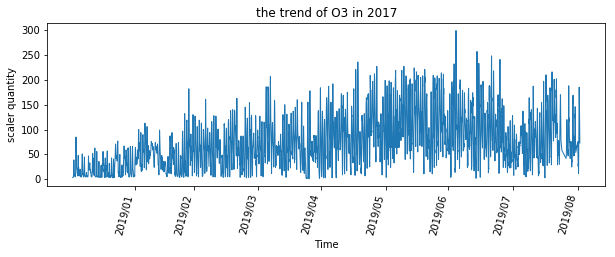

In [248]:
drawO3(datanew, dataIndex, "2017")

**<font color="red" size=5>将关于O3的数据，单独存储起来<font>**

In [249]:
O3data = datanew[["year", "month", "day", "hour", "O3", "O3_24h", "O3_8h", "O3_8h_24h"]]

In [250]:
writefile = "data\O3data\O3data.csv"

In [251]:
O3data.to_csv(writefile, index=True, sep=',', mode='a')